In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import datetime
import networkx as nx

In [2]:
trips_df = pd.read_csv("202010-bluebikes-tripdata.csv")
stations_df = pd.read_csv('current_bluebikes_stations.csv')

In [3]:
trips_df.drop(columns=["bikeid", "usertype",'start station id','end station id','postal code'], inplace=True);

In [4]:
trips_df.head()

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude
0,230,2020-10-01 00:00:21.2140,2020-10-01 00:04:12.0810,Harvard University Radcliffe Quadrangle at She...,42.380287,-71.125107,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579
1,1009,2020-10-01 00:01:07.2140,2020-10-01 00:17:57.0620,Silber Way,42.349496,-71.100576,Central Square at Mass Ave / Essex St,42.365070,-71.103100
2,188,2020-10-01 00:02:08.7940,2020-10-01 00:05:16.8240,Mass Ave at Albany St,42.361358,-71.096703,MIT Pacific St at Purrington St,42.359573,-71.101295
3,1016,2020-10-01 00:03:29.2600,2020-10-01 00:20:26.1410,Cleveland Circle,42.335543,-71.150615,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271
4,1147,2020-10-01 00:03:48.1480,2020-10-01 00:22:55.7210,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,E Cottage St at Columbia Rd,42.320561,-71.061980


In [5]:
new_header = stations_df.iloc[0]
stations_df = stations_df[1:]
stations_df.columns = new_header 

stations_df.drop(columns=["Number", "District",'Public','Total docks'], inplace=True);

stations_df.head()

,Name,Latitude,Longitude
1,175 N Harvard St,42.363796,-71.129164
2,191 Beacon St,42.38032335,-71.10878613
3,30 Dane St,42.38100143,-71.10402523
4,359 Broadway - Broadway at Fayette Street,42.370803,-71.104412
5,645 Summer St,42.34178089,-71.03987017


In [18]:
school = ['Ames St at Main St', 'Harvard Kennedy School at Bennett St / Eliot St', 'Harvard Law School at Mass Ave / Jarvis St', \
         'Harvard University / SEAS Cruft-Pierce Halls at 29 Oxford St', 'Harvard University Gund Hall at Quincy St / Kirkland St', \
         'Harvard University Housing - 115 Putnam Ave at Peabody Terrace', 'Harvard University Radcliffe Quadrangle at Shepard St / Garden St', \
         'Harvard University River Houses at DeWolfe St / Cowperthwaite St', 'MIT at Mass Ave / Amherst St', \
          'MIT Carleton St at Amherst St', 'MIT Pacific St at Purrington St', 'MIT Stata Center at Vassar St / Main St', \
         'MIT Vassar St']

recreational = ['Boston Public Market', 'Boylston St at Charles St', 'Boylston St at Exeter St', \
                'Central Square at Mass Ave / Essex St', 'Christian Science Plaza - Massachusetts Ave at Westland Ave', \
               'Fan Pier', 'Harvard Square at Brattle St / Eliot St', 'Harvard Square at Mass Ave/ Dunster', \
                'Nashua Street at Red Auerbach Way', 'Prudential Center - 101 Huntington Ave', 'Ring Rd', \
               'Seaport Blvd at Sleeper St', 'Seaport Square - Seaport Blvd at Northern Ave', 'The Lawn on D', \
               'Tremont St at West St', 'Watermark Seaport - Boston Wharf Rd at Seaport Blvd']

functional = ['175 N Harvard St', 'Airport T Stop - Bremen St at Brooks St', 'Aquarium T Stop - 200 Atlantic Ave', \
             'Boston City Hall - 28 State St', 'Chinatown T Stop', 'Congress St at Boston City Hall', \
              'Government Center - Cambridge St at Court St', 'Kendall T', 'Lechmere Station at Cambridge St / First St', \
             'One Broadway / Kendall Sq at Main St / 3rd St', 'South Station - 700 Atlantic Ave']


In [19]:
names = ['Ames St at Main St', 'Harvard Kennedy School at Bennett St / Eliot St', 'Harvard Law School at Mass Ave / Jarvis St', \
         'Harvard University / SEAS Cruft-Pierce Halls at 29 Oxford St', 'Harvard University Gund Hall at Quincy St / Kirkland St', \
         'Harvard University Housing - 115 Putnam Ave at Peabody Terrace', 'Harvard University Radcliffe Quadrangle at Shepard St / Garden St', \
         'Harvard University River Houses at DeWolfe St / Cowperthwaite St', 'MIT at Mass Ave / Amherst St', \
          'MIT Carleton St at Amherst St', 'MIT Pacific St at Purrington St', 'MIT Stata Center at Vassar St / Main St', \
         'MIT Vassar St', 'Boston Public Market', 'Boylston St at Charles St', 'Boylston St at Exeter St', \
         'Central Square at Mass Ave / Essex St', 'Christian Science Plaza - Massachusetts Ave at Westland Ave', \
         'Fan Pier', 'Harvard Square at Brattle St / Eliot St', 'Harvard Square at Mass Ave/ Dunster', \
         'Nashua Street at Red Auerbach Way', 'Prudential Center - 101 Huntington Ave', 'Ring Rd', \
         'Seaport Blvd at Sleeper St', 'Seaport Square - Seaport Blvd at Northern Ave', 'The Lawn on D', \
         'Tremont St at West St', 'Watermark Seaport - Boston Wharf Rd at Seaport Blvd', '175 N Harvard St', \
         'Airport T Stop - Bremen St at Brooks St', 'Aquarium T Stop - 200 Atlantic Ave', 'Boston City Hall - 28 State St', \
         'Chinatown T Stop', 'Congress St at Boston City Hall', 'Government Center - Cambridge St at Court St', \
         'Kendall T', 'Lechmere Station at Cambridge St / First St','One Broadway / Kendall Sq at Main St / 3rd St', \
         'South Station - 700 Atlantic Ave']

In [20]:
# Record the index of each relevant trip

list_of_trips = []

for idx, row in trips_df.iterrows():
    if row['start station name'] in names:
        if row['end station name'] in names:
            list_of_trips.append(idx)

In [21]:
# Dictionary matching station names to their index in list of names

station_dict = {}

for i in range(0,len(names)):
    station_dict[names[i]] = i   

In [22]:
start_station = trips_df['start station name']
end_station = trips_df['end station name']

In [23]:
# Adjacency matrix of trips, assuming directions
A = np.zeros((len(names),len(names)))

for index in list_of_trips:
    i = station_dict[start_station[index]]
    j = station_dict[end_station[index]]
    A[i,j] += 1

In [28]:
# Dictionary matching station names to their lat-long coordinates

locations = {}

for idx, row in stations_df.iterrows():
    
    locations[row['Name']] = (float(row['Longitude']),float(row['Latitude']))
    

{'175 N Harvard St': (-71.129164, 42.363796), '191 Beacon St': (-71.10878613, 42.38032335), '30 Dane St': (-71.10402523, 42.38100143), '359 Broadway - Broadway at Fayette Street': (-71.104412, 42.370803), '645 Summer St': (-71.03987017, 42.34178089), '699 Mt Auburn St': (-71.14871614, 42.37500235), '7 Acre Park': (-71.06823265, 42.41143223), '700 Commonwealth Ave.': (-71.10391524, 42.34960945), '700 Huron Ave': (-71.15412891, 42.38078817), '75 Binney St': (-71.0801376, 42.36550729), '84 Cambridgepark Dr': (-71.143941, 42.3936), 'Adams St at Lonsdale St': (-71.05726346, 42.29167943), 'Airport T Stop - Bremen St at Brooks St': (-71.03276393, 42.37407974), 'Albany St at E. Brookline St': (-71.0689446, 42.33664795), 'Alewife MBTA at Steel Place': (-71.14260614, 42.39558846), 'Alewife Station at Russell Field': (-71.139459, 42.396105), 'American Legion Hwy at Canterbury St': (-71.11687703, 42.27881158), 'Ames St at Broadway': (-71.0875672, 42.3636929), 'Ames St at Main St': (-71.08822, 42.3

In [29]:
# Make a directed graph out of adjacency matrix
G = nx.DiGraph(A)

# Assign each station a color depending on type
# Schools are red, recreational is blue, and functional is yellow 
node_color = []
for i in G.nodes():
    if i in range(0,13):
        node_color.append('red')
    elif i in range(13,29):
        node_color.append('blue')
    elif i in range(29,40):
        node_color.append('yellow')
node_color = np.array(node_color)

# Size of nodes by eigenvector centrality
eigen = nx.eigenvector_centrality(G, weight='weight', tol=0.01)

# Save eigencentralities in correct order for node sizing, convert to array from list
sizes = []
for i in G.nodes():
    sizes.append(eigen[i])
sizes = np.array(sizes)    

# Save edge weights
edge_weights = np.array(list(dict(nx.get_edge_attributes(G, 'weight')).values()))

In [30]:
# Dictionary matching node numbers to their lat-long coordinates

node_loc = {}

for i in G.nodes():
    node_loc[i] = locations[names[i]]

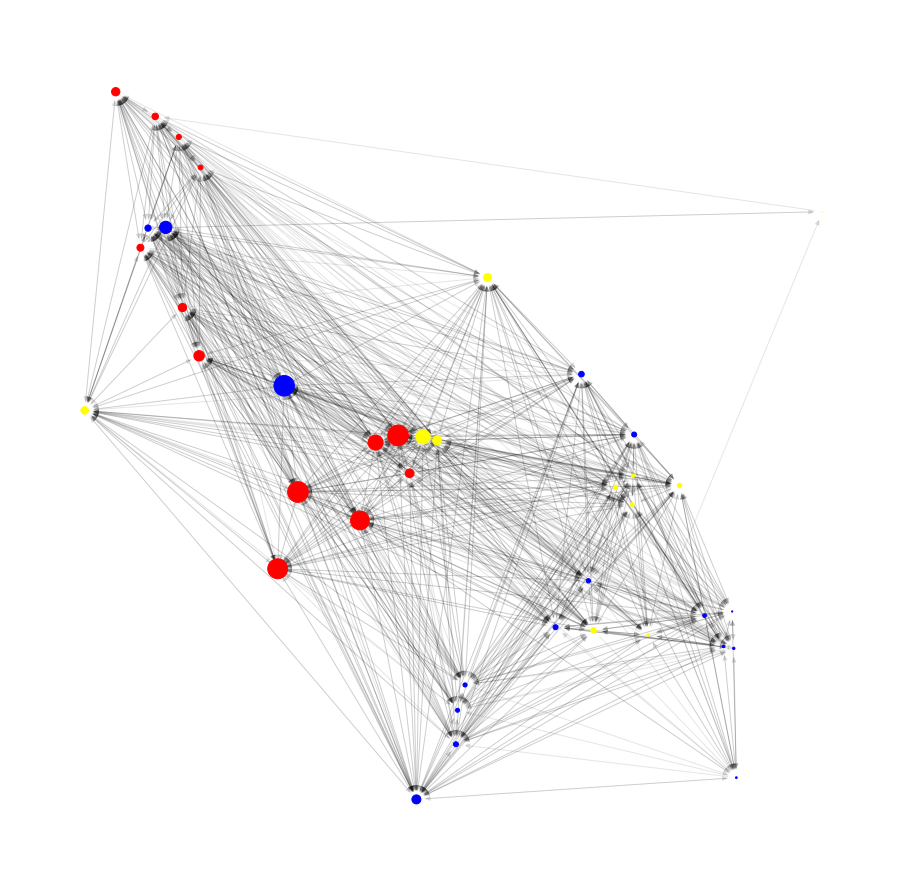

In [31]:
# Plot the graph
fig = plt.figure(figsize=(16,16))
plt.axis('off')
nx.draw_networkx_edges(G, pos=node_loc, alpha=0.1)
nx.draw_networkx_nodes(G, pos=node_loc, node_size=1000*sizes, node_color=node_color)